# Marketting Analytics

#### In this project Data science tool set like `numpy`, `pandas`, `matplotlib`, `seaborn` and `statsmodels` will be utilized in Analysing and building predictive model to understand customer purchasing behavior (customer segmentation) of online retail sales

## Background
#### A UK-based online retailer specializing in unique gifts experienced rapid growth between 2009 and 2011. To understand their customers better, they compiled the Online Retail II dataset, containing all transactions from December 1, 2009, to December 9, 2011.

#### This dataset offers a wealth of information on customer behavior, sales trends, and product preferences. Our goal is to uncover valuable insights from this data, shedding light on what drives this successful e-commerce business.

#### `Users` :
-    ####  Marketing teams
-    ####  Sales teams
-    ####  E-commerce managers

#### `Goals` :
-    ####  Analyze customer behavior and purchasing patterns
-    ####  Optimize marketing and sales efforts
-    ####  Improve customer experience
-    ####  Increase revenue and growth

#### `Pain` :
-    ####  Difficulty retaining customers and driving repeat business
-    ####  Limited insights into sales trends and product performance
-    ####  Inefficient marketing and sales efforts


## Value Proposition
#### Build a customer segmentation ML model and cohort analytics dashboad that provide insight into customer purchasing behavious to improve customer experience leading to improved revenue generation.

### `Product` : a model that segments customer base on their cohort and a model that predict future sales
### `Alleviates` : Reduce Customer churn rate with improve customer experience due to better customer behavior understanding
### `Advantages` : When the model and dashboard are used, personalised email and discount can be sent to customers based on their segment. Resource are allocated properly.


## Objectives 

- #### Retrieve Monthly, Quarterly and Yearly customer data from e-cormence platform and other sources
- #### Segment the customer base on their cohorts & predict future sales
- #### Allocate more resources to improve experience of high value customers

## System Design

## Metrics

#### `Segementation` : Sum of Square Error (Intertia)
#### `Sales` : Root Mean Squared Error

In [231]:
# import the need packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
import gradio as gr
import streamlit as st 


In [232]:
# load the data
df = pd.read_csv('./data/online.csv')

In [233]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [234]:
df = df.drop(['Unnamed: 0'], axis=1)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    70864 non-null  int64  
 1   StockCode    70864 non-null  object 
 2   Description  70864 non-null  object 
 3   Quantity     70864 non-null  int64  
 4   InvoiceDate  70864 non-null  object 
 5   UnitPrice    70864 non-null  float64
 6   CustomerID   70864 non-null  int64  
 7   Country      70864 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.3+ MB


#### All columns have the right datatype except InvoiceDate

In [236]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.3+ MB


#### Descriptive statistic of the data (Quantity and UnitPrice, other numeric stats convey no insight)

In [238]:
# Slicing Unit price and Qunatity descriptive statistic
df.describe().T.loc[['Quantity', 'UnitPrice']]

,count,mean,min,25%,50%,75%,max,std
Quantity,70864.0,11.511233,1.0,2.0,4.0,12.0,4300.0,41.017582
UnitPrice,70864.0,3.063033,0.001,1.25,1.95,3.75,8142.75,31.89497


### Descriptive stats for the non-numeric column

In [239]:
df.describe(include="object").T

,count,unique,top,freq
StockCode,70864,3227,85123A,381
Description,70864,3352,WHITE HANGING HEART T-LIGHT HOLDER,381
Country,70864,1,United Kingdom,70864


### The data does not require much clearning as that is no the main objective of this project. Data Cleaning techniques and cleaning will be tackled in other projects

### A Dive into Marketing and Customer Analystic

## Cohort Analysis
#### Simply put, is a way of grouping customers into  small groups based on common charateristics / experience within a defind time span
#### This cohort can be based on :
- ####  Time period customer was acquired - `Acquisition Cohort`
- ####  Behavior of customers (purchasing patterns, cancellations etc) - `Behavorial Cohort`

### Let build an acquisition cohort to understand customer retention
####  We start by defining acquisition timeframe (Monthly, Daily or Yearly) 

In [240]:
#defining a helper function to parse the invoice date columns (Aquisition Month Cohort)
def get_month(X):
    return dt.datetime(X.year, X.month, 1)

In [241]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [242]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


#### Every InvoiceDate has the first of that Date's Month as the invoiceMonth

### Creating a cohort month for each customer

In [243]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [244]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


### To understand this, lets take a look at the first row for columns `CustomerID`, `InvoiceMonth`, `CohortMonth`

In [245]:
df[['CustomerID','InvoiceMonth', 'CohortMonth']].head(1)

,CustomerID,InvoiceMonth,CohortMonth
0,14286,2011-10-01,2011-04-01


### customer 14286 was acquired in Month April 2011 (cohortmonth). Invoice month show a later day purchase they since they were

### Now let's create a helper function to extract individual dates component (year, month) from both InvoiceMonth and CohortMonth. This will help in calculating the time offset value for time of acquisition and subsequent transactions

In [246]:
def get_date_comp(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    return year, month

In [247]:
cohort_year, cohort_month = get_date_comp(df, 'CohortMonth')
invoice_year, invoice_month = get_date_comp(df, 'InvoiceMonth')

In [248]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df['CohortIndex'] = years_diff * 12 + months_diff + 1


In [249]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [250]:
df[['CustomerID','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head(1)

,CustomerID,InvoiceMonth,CohortMonth,CohortIndex
0,14286,2011-10-01,2011-04-01,7


### The cohortIndex indicate customer `14286` has 7 months from time of acquisition to this particular Invoice

### Lets count monthly active customers in each cohort

In [251]:
df.groupby(['CohortMonth', 'CohortIndex']).first()

InvoiceNo StockCode  \
CohortMonth CohortIndex                        
2010-12-01  1               536673     21803   
            2               540357     22382   
            3               543984     21873   
            4               547223     22934   
            5               550157     22979   
...                            ...       ...   
2011-10-01  2               577516     22360   
            3               580771     22638   
2011-11-01  1               578307    72349B   
            2               580721     22083   
2011-12-01  1               580094     23359   

                                                Description  Quantity  \
CohortMonth CohortIndex                                                 
2010-12-01  1                CHRISTMAS TREE STAR DECORATION        36   
            2                    LUNCH BAG SPACEBOY DESIGN         20   
            3               IF YOU CAN'T STAND THE HEAT MUG        12   
            4            BAKING MOULD EASTER EGG WHITE CHOC         2   
            5                       PANTRY WASHING UP BRUSH         2   
...                                                     ...       ...   
2011-10-01  2               GLASS JAR ENGLISH CONFECTIONERY         1   
            3                SET OF 4 NAPKIN CHARMS CROWNS          4   
2011-11-01  1               SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
            2                     PAPER CHAIN KIT RETROSPOT         6   
2011-12-01  1              SET OF 12 T-LIGHTS VINTAGE DOILY         3   

                                InvoiceDate  UnitPrice  CustomerID  \
CohortMonth CohortIndex                                              
2010-12-01  1           2010-12-02 12:11:00       0.42       14060   
            2           2011-01-06 15:14:00       1.65       13093   
            3           2011-02-15 09:35:00       1.25       15601   
            4           2011-03-21 15:10:00       2.95       12867   
            5           2011-04-14 15:26:00       1.45       16393   
...                                     ...        ...         ...   
2011-10-01  2           2011-11-20 13:08:00       2.95       16533   
            3           2011-12-06 10:58:00       0.79       16015   
2011-11-01  1           2011-11-23 15:53:00       2.10       17290   
            2           2011-12-05 16:57:00       2.95       15274   
2011-12-01  1           2011-12-01 14:50:00       1.95       15904   

                                Country InvoiceMonth  
CohortMonth CohortIndex                               
2010-12-01  1            United Kingdom   2010-12-01  
            2            United Kingdom   2011-01-01  
            3            United Kingdom   2011-02-01  
            4            United Kingdom   2011-03-01  
            5            United Kingdom   2011-04-01  
...                                 ...          ...  
2011-10-01  2            United Kingdom   2011-11-01  
            3            United Kingdom   2011-12-01  
2011-11-01  1            United Kingdom   2011-11-01  
            2            United Kingdom   2011-12-01  
2011-12-01  1            United Kingdom   2011-12-01  

[91 rows x 9 columns]

In [252]:
df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

CohortMonth  CohortIndex
2010-12-01   1              716
             2              246
             3              221
             4              251
             5              245
                           ... 
2011-10-01   2               67
             3               30
2011-11-01   1              291
             2               32
2011-12-01   1               38
Name: CustomerID, Length: 91, dtype: int64

### for cohort Month of December 2010 1 month from acquisition(in the same month customer was acquire) we have `716` customers 

In [253]:
# saving this into a new dataframe and reseting the index to make the CohortMonth and CohortIndex back into a column
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


### Let pivot the data to get out acqusition cohort table

In [254]:
acquisition_table = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
acquisition_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Column indicates number of months after acquisition
#### Row indicates the Cohort (Months customer was acquired)
#### Values numbers of customers acquired

### To Interpret this: for cohort December 2010 In the first month(months customer was acquire) 716 customers. It can be observed only 246 from 716 acquire made a transaction in the third only 221.
### With this we can understand customers retention or churn rate, revenue growth

### Let calculate rentention to understand the how many customers return for a transaction in subsequent month from time of acquisition

In [255]:
# retrieve the size of each cohort which is the first month
cohort_size = acquisition_table.iloc[:, 0]
cohort_size

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64

In [256]:
# dividing all values in the cohort to get the rentention
retention = acquisition_table.divide(cohort_size, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### First Month retention will be 100% since thats the month the customers were aquired

### Other Metrics could be the quantity purchased by cohorts

In [257]:
df.groupby(['CohortMonth', 'CohortIndex']).first()

InvoiceNo StockCode  \
CohortMonth CohortIndex                        
2010-12-01  1               536673     21803   
            2               540357     22382   
            3               543984     21873   
            4               547223     22934   
            5               550157     22979   
...                            ...       ...   
2011-10-01  2               577516     22360   
            3               580771     22638   
2011-11-01  1               578307    72349B   
            2               580721     22083   
2011-12-01  1               580094     23359   

                                                Description  Quantity  \
CohortMonth CohortIndex                                                 
2010-12-01  1                CHRISTMAS TREE STAR DECORATION        36   
            2                    LUNCH BAG SPACEBOY DESIGN         20   
            3               IF YOU CAN'T STAND THE HEAT MUG        12   
            4            BAKING MOULD EASTER EGG WHITE CHOC         2   
            5                       PANTRY WASHING UP BRUSH         2   
...                                                     ...       ...   
2011-10-01  2               GLASS JAR ENGLISH CONFECTIONERY         1   
            3                SET OF 4 NAPKIN CHARMS CROWNS          4   
2011-11-01  1               SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
            2                     PAPER CHAIN KIT RETROSPOT         6   
2011-12-01  1              SET OF 12 T-LIGHTS VINTAGE DOILY         3   

                                InvoiceDate  UnitPrice  CustomerID  \
CohortMonth CohortIndex                                              
2010-12-01  1           2010-12-02 12:11:00       0.42       14060   
            2           2011-01-06 15:14:00       1.65       13093   
            3           2011-02-15 09:35:00       1.25       15601   
            4           2011-03-21 15:10:00       2.95       12867   
            5           2011-04-14 15:26:00       1.45       16393   
...                                     ...        ...         ...   
2011-10-01  2           2011-11-20 13:08:00       2.95       16533   
            3           2011-12-06 10:58:00       0.79       16015   
2011-11-01  1           2011-11-23 15:53:00       2.10       17290   
            2           2011-12-05 16:57:00       2.95       15274   
2011-12-01  1           2011-12-01 14:50:00       1.95       15904   

                                Country InvoiceMonth  
CohortMonth CohortIndex                               
2010-12-01  1            United Kingdom   2010-12-01  
            2            United Kingdom   2011-01-01  
            3            United Kingdom   2011-02-01  
            4            United Kingdom   2011-03-01  
            5            United Kingdom   2011-04-01  
...                                 ...          ...  
2011-10-01  2            United Kingdom   2011-11-01  
            3            United Kingdom   2011-12-01  
2011-11-01  1            United Kingdom   2011-11-01  
            2            United Kingdom   2011-12-01  
2011-12-01  1            United Kingdom   2011-12-01  

[91 rows x 9 columns]

In [258]:
# Averaging the quantity column
df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean()

CohortMonth  CohortIndex
2010-12-01   1              11.111588
             2              12.260241
             3              12.152314
             4              13.228676
             5              13.669839
                              ...    
2011-10-01   2               7.452211
             3               5.987654
2011-11-01   1               7.840920
             2               7.145455
2011-12-01   1              21.336538
Name: Quantity, Length: 91, dtype: float64

In [259]:
# Saving the result and reseting the index
cd2 = df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
cd2.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,11.111588
1,2010-12-01,2,12.260241
2,2010-12-01,3,12.152314
3,2010-12-01,4,13.228676
4,2010-12-01,5,13.669839


In [260]:
# Pivot the data to build acquisition table
avg_quan = cd2.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity').round(2)

In [261]:
avg_quan

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.11,12.26,12.15,13.23,13.67,11.29,10.62,12.78,13.21,12.99,14.46,10.92,13.73
2011-01-01,10.88,10.77,9.98,10.12,14.34,13.16,17.37,16.38,18.68,10.23,10.68,13.20,NaN
2011-02-01,12.12,14.30,10.60,11.48,17.47,12.15,17.31,13.17,13.41,15.88,14.34,NaN,NaN
2011-03-01,9.56,14.24,12.97,10.17,16.11,12.66,11.58,11.45,9.00,9.59,NaN,NaN,NaN
2011-04-01,9.87,11.05,12.42,11.52,11.39,7.69,10.41,9.38,6.64,NaN,NaN,NaN,NaN
2011-05-01,14.11,9.62,15.28,11.58,11.93,8.51,9.79,7.31,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.60,16.06,18.06,11.23,12.45,7.22,9.72,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.95,16.40,5.59,10.07,6.24,7.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.50,7.36,5.50,5.70,6.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now lets visualize the acquisition table to get holistic picture of what is going on

<Axes: title={'center': 'Retention rate'}, xlabel='CohortIndex', ylabel='CohortMonth'>

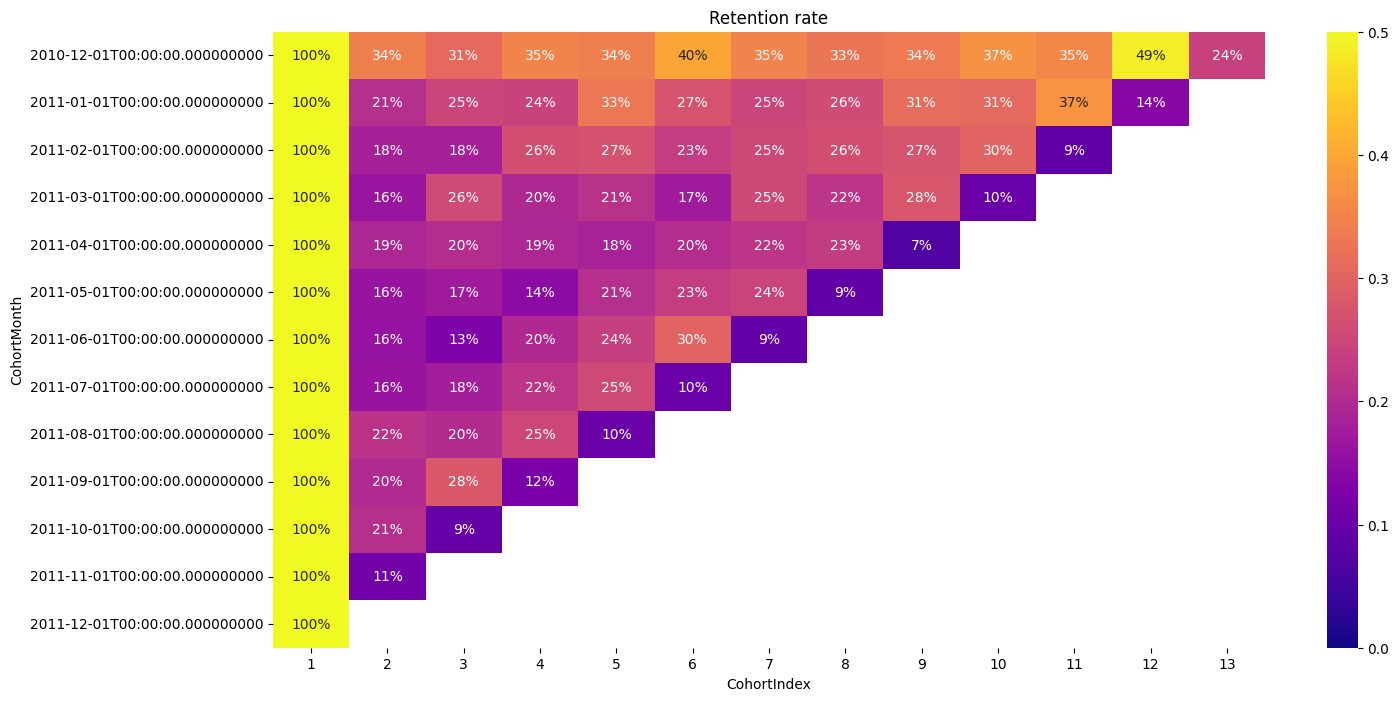

In [262]:
plt.figure(figsize=(16,8))
plt.title("Retention rate")
sns.heatmap(data=retention, annot=True, fmt=".0%", vmin=0.0, vmax=0.5, cmap='plasma')

### This is monthly cohort Analysis. This can be down on   `daily`, `weekly` or `yearly` cohorts

## RFM Segmentation (`Recency`, `Frequency` `Monetary Value`):
### A technique that segments customers based on their behaviour. In terms how `R`ecently they transact, how `F`requently they transact and How large (`M`onetary value) their transactions is.

### Lets segment our customers into percentile groupings based on RFM

#### We need to define the recent date from which we measure the recency of a transaction

In [263]:
# one day more from last invoice
current_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [264]:
# Total Sales
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

In [265]:
behaviour_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x : (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})

In [266]:
behaviour_data.head()

,InvoiceDate,InvoiceNo,TotalSales
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [267]:
# renaming the columns
behaviour_data = behaviour_data.rename(columns={
    'InvoiceDate':'Recency',
    'InvoiceNo':'Frequency',
    'TotalSales':'MonetaryValue'
})

In [268]:
behaviour_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


#### We will segment the Recency into 4 quartiles most recent with be assign big value to mean least recent will have low value

In [269]:
recency_q = pd.qcut(behaviour_data['Recency'], q=4, labels=range(4, 0, -1))
behaviour_data['R'] = recency_q.values
behaviour_data

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12747,2,27,992.82,4
12748,1,967,7522.06,4
12749,4,37,813.45,4
12820,3,17,268.02,4
12822,71,9,146.15,2
...,...,...,...,...
18280,278,2,38.70,1
18281,181,2,31.80,1
18282,8,2,30.70,4


### For frequency and monetary value, most frequent and large sums will be assigned big value and least frequent and small sums will be assigned low value

In [270]:
frequency_q = pd.qcut(behaviour_data['Frequency'], q=4, labels=range(1, 5))
behaviour_data['F'] = frequency_q.values
behaviour_data

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12747,2,27,992.82,4,4
12748,1,967,7522.06,4,4
12749,4,37,813.45,4,4
12820,3,17,268.02,4,3
12822,71,9,146.15,2,2
...,...,...,...,...,...
18280,278,2,38.70,1,1
18281,181,2,31.80,1,1
18282,8,2,30.70,4,1


In [271]:
monetaryvalue_q = pd.qcut(behaviour_data['MonetaryValue'], q=4, labels=range(1, 5))
behaviour_data['M'] = monetaryvalue_q.values
behaviour_data

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3
...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1
18281,181,2,31.80,1,1,1
18282,8,2,30.70,4,1,1


### Building RFM segment and RFM Score

In [272]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
behaviour_data['RFM_Segment'] = behaviour_data.apply(join_rfm, axis=1)
behaviour_data['RFM_Score'] = behaviour_data[['R', 'F', 'M']].sum(axis=1)

In [273]:
behaviour_data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12
12748,1,967,7522.06,4,4,4,444,12
12749,4,37,813.45,4,4,4,444,12
12820,3,17,268.02,4,3,3,433,10
12822,71,9,146.15,2,2,3,223,7


### Lets group large RFM segment

In [274]:
behaviour_data.groupby("RFM_Segment").size().sort_values(ascending=False).head()

RFM_Segment
444    382
111    346
211    168
344    162
233    132
dtype: int64

In [275]:
behaviour_data.groupby(['RFM_Score']).agg({
    "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue": ["mean", "count"]
})

Recency  Frequency MonetaryValue      
                 mean       mean          mean count
RFM_Score                                           
3          256.739884   2.043353     28.542659   346
4          175.704023   3.206897     47.991264   348
5          145.295567   4.325123     79.619360   406
6          105.445727   6.351039    149.363279   433
7           82.833333   8.882812    163.143021   384
8           63.384817  12.814136    198.578508   382
9           48.414986  16.775216    330.005911   347
10          32.895604  24.480769    438.785165   364
11          21.576052  38.786408    709.421424   309
12           7.623037  77.256545   1709.002173   382

### Lets build a heuristice function that segment our customers into gold, bronze and silver

In [276]:
def segment_cust(data):
    if data['RFM_Score'] >= 9:
        return "Gold"
    elif data['RFM_Score'] >=5 and data['RFM_Score'] < 9:
        return "Bronze"

    else:
        return "Silver"

In [277]:
behaviour_data['General_Segment'] = behaviour_data.apply(segment_cust, axis = 1)

In [278]:
behaviour_data.groupby(['General_Segment']).agg({
    "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue": ["mean", "count"]
})

Recency  Frequency MonetaryValue      
                       mean       mean          mean count
General_Segment                                           
Bronze           100.105296   7.982555    146.731259  1605
Gold              27.355920  40.106277    817.603353  1402
Silver           216.105187   2.626801     38.294986   694

### Rather than use a heuristic function for segmentation, Lets employ machine learning for segmenting the customers.

### We will use `K-means` custering 

### Assuptions of K Means clusting
- #### Symmetric Distribution (normal distribution)
- #### Variables should have the same averages
- #### Variables should have the same features

#### We start by checking this assumptions in our data

<Axes: xlabel='Recency', ylabel='Density'>

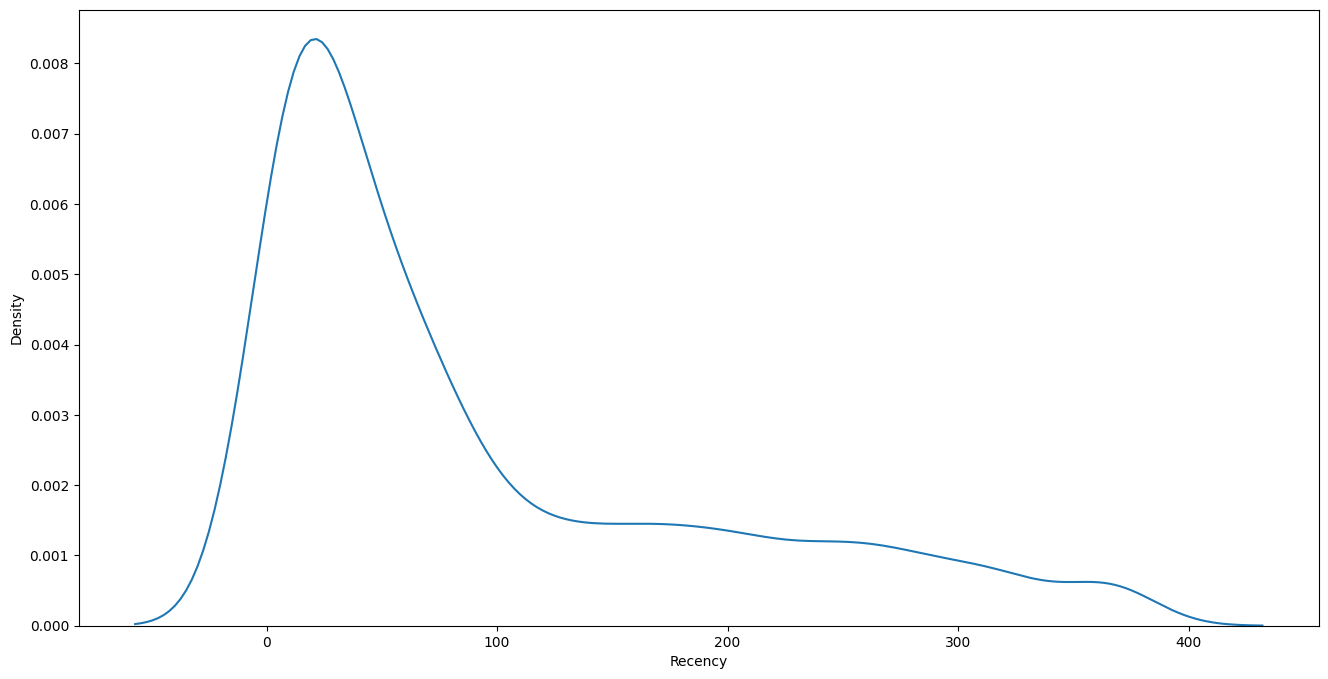

In [279]:
plt.figure(figsize=(16, 8))
sns.kdeplot(behaviour_data['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

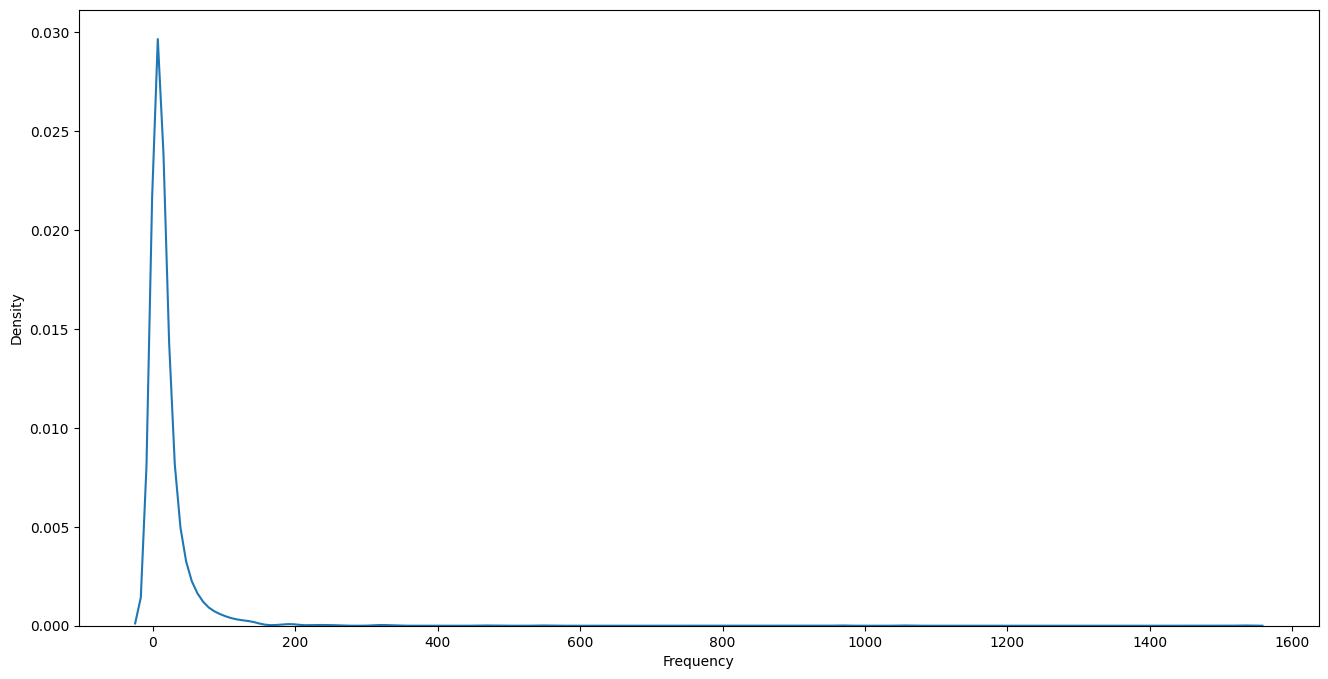

In [280]:
plt.figure(figsize=(16, 8))
sns.kdeplot(behaviour_data['Frequency'])

<Axes: xlabel='MonetaryValue', ylabel='Density'>

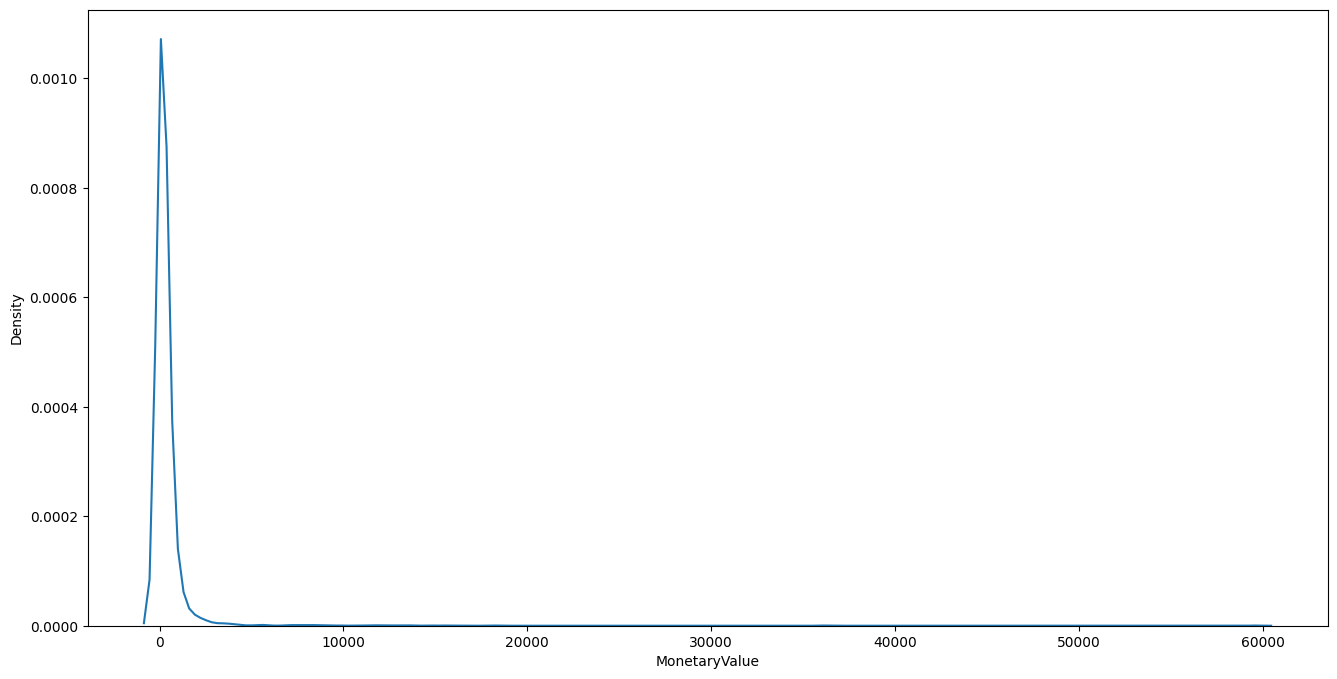

In [281]:
plt.figure(figsize=(16, 8))
sns.kdeplot(behaviour_data['MonetaryValue'])

### As observed our three variables are skewed and `k-means` would perform poorly with them.
### We will transform the data to using log_transform  from numpy or boxcox transformer form scipy

<Axes: xlabel='Recency', ylabel='Density'>

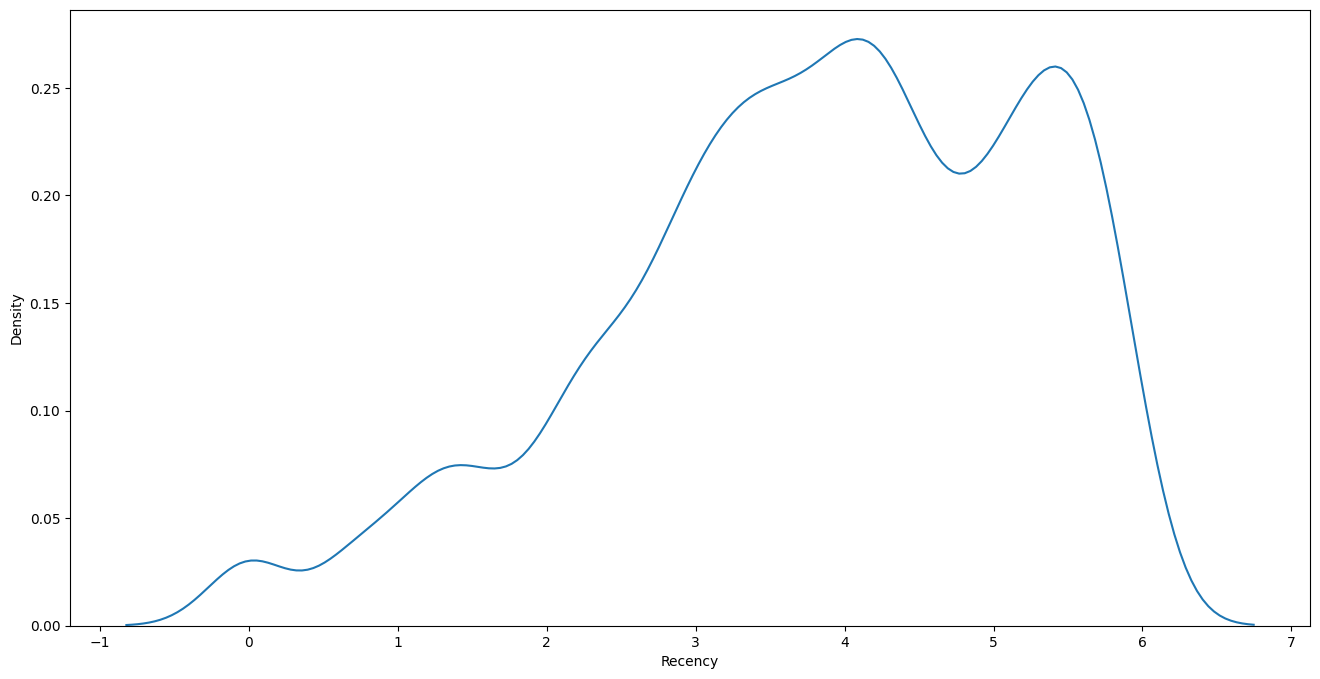

In [282]:
plt.figure(figsize=(16, 8))
sns.kdeplot(np.log(behaviour_data['Recency']))

<Axes: xlabel='Frequency', ylabel='Density'>

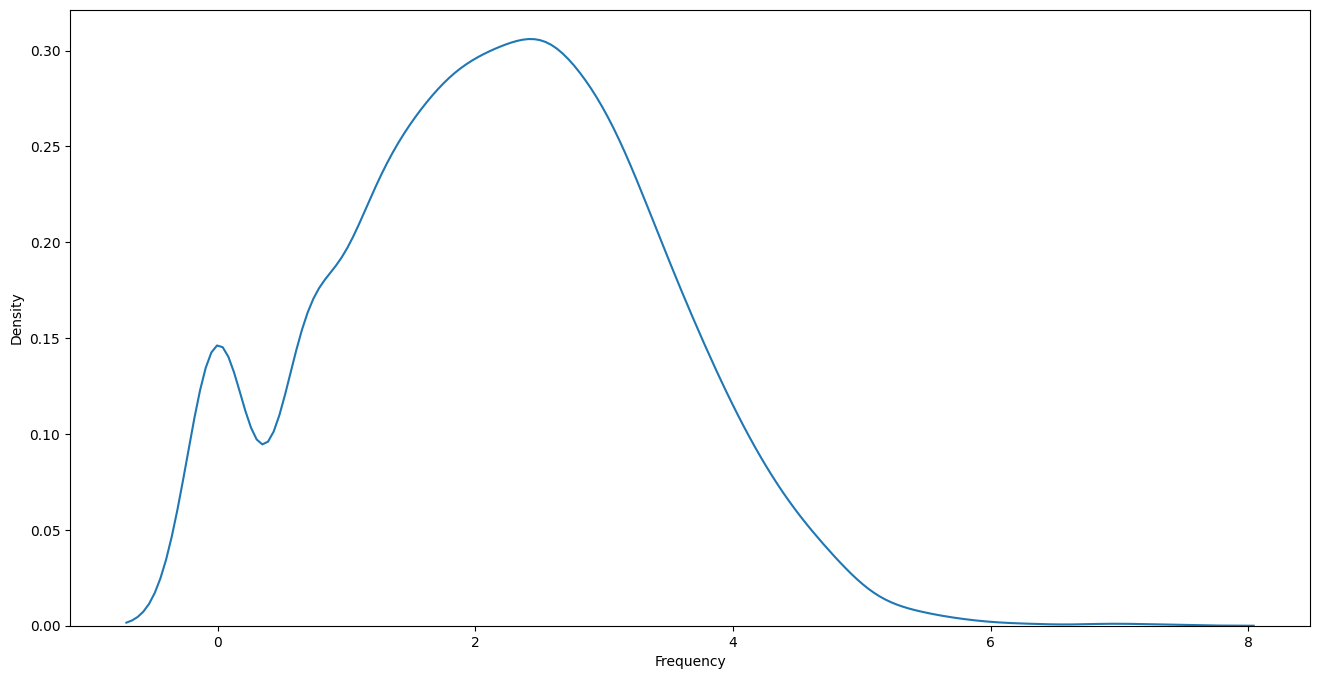

In [283]:
plt.figure(figsize=(16, 8))
sns.kdeplot(np.log(behaviour_data['Frequency']))

<Axes: xlabel='MonetaryValue', ylabel='Density'>

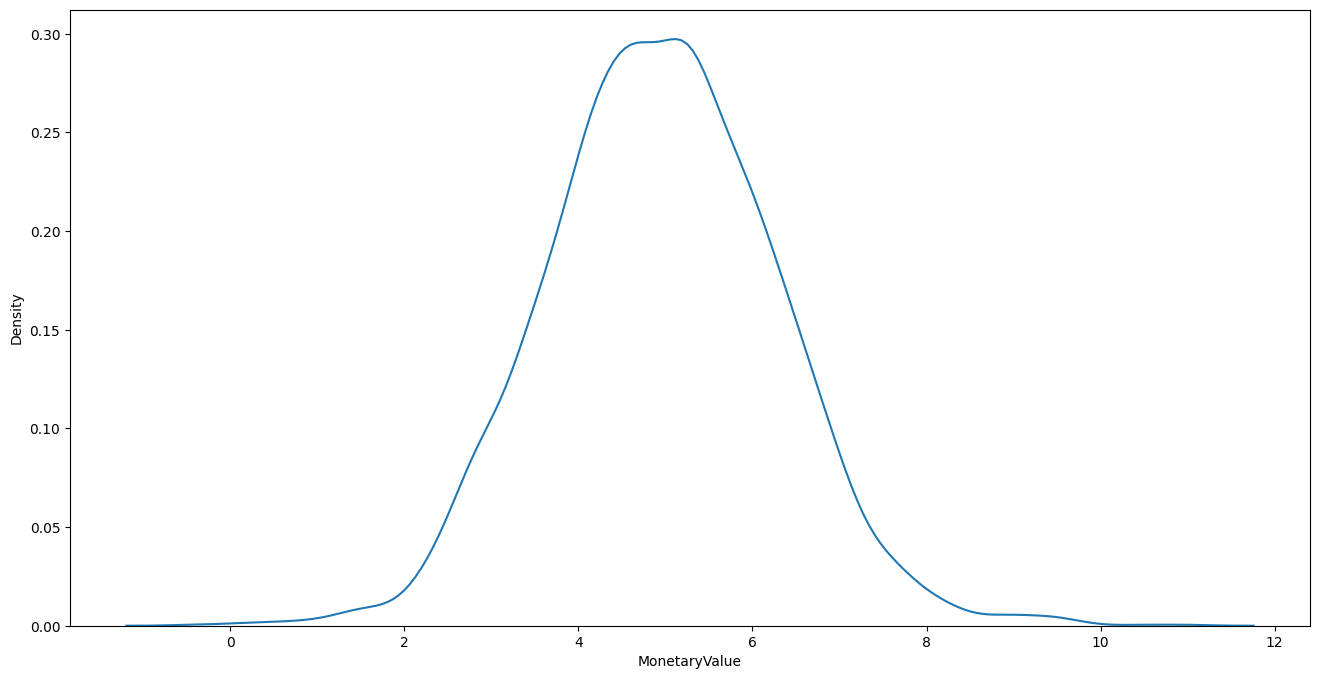

In [284]:
plt.figure(figsize=(16, 8))
sns.kdeplot(np.log(behaviour_data['MonetaryValue']))

### Although not perfect but compared to the original transformed is more normilised

In [285]:
behaviour_data.describe().loc[['mean', 'std']]

,Recency,Frequency,MonetaryValue,RFM_Score
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434


### mean and variance does not meet the assumption. We will need to scale them

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
scaler = StandardScaler()

In [288]:
scaler.fit(behaviour_data[['Recency', 'Frequency', 'MonetaryValue']])

StandardScaler()

In [289]:
scaler_bd = scaler.transform(behaviour_data[['Recency', 'Frequency', 'MonetaryValue']])

In [290]:
scaler_bd.mean(axis=0).round(2)

array([-0.,  0.,  0.])

In [291]:
scaler_bd.std(axis=0).round(2)

array([1., 1., 1.])

### all assumption for a `k-means` are satisfied

In [292]:
feature_data = behaviour_data[['Recency', 'Frequency', 'MonetaryValue']]
feature_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [293]:
log_feature_data = np.log(feature_data)

In [294]:
scaler = StandardScaler()
normalized_log_fd = scaler.fit_transform(log_feature_data)

### Time to train a model for segmentation

In [295]:
from sklearn.cluster import KMeans

In [296]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [297]:
kmeans.fit(normalized_log_fd)

KMeans(n_clusters=2, random_state=42)

In [298]:
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, ..., 0, 1, 1])

In [299]:
feature_data_2 = feature_data.assign(Cluster = cluster_labels)

### Our customers are segmented in two clusters. Lets use an elbow method for picking the best number of clusters

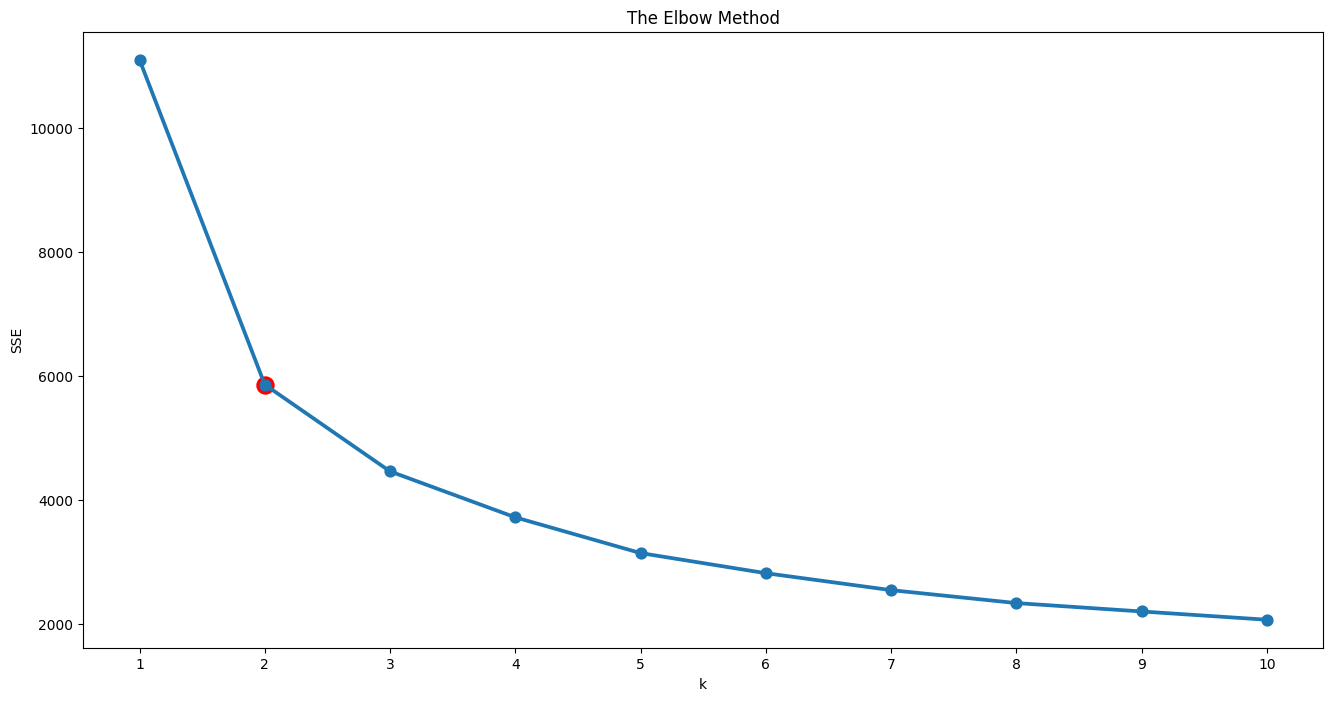

In [300]:
# define a dictionary of sum of squared error
sse = {}

# loop through a range of 10 k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_log_fd)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(16, 8))
plt.title("The Elbow Method")
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.scatter(x=1, y=5858, color='red', s=150)
plt.xlabel("k")
plt.ylabel("SSE");


### From the elbow plot the point with the red circle is the best cluster which is 2, we might want to explore other close solutions like 3

In [301]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(normalized_log_fd)
cls_label = kmeans_3.labels_

In [302]:
feature_data_3 = feature_data.assign(Cluster = cls_label)

In [303]:
print("3 cluster")
display(feature_data_3.groupby("Cluster").agg({
    "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue": ["mean", "count"]
}))

print("2 cluster")
display(feature_data_2.groupby('Cluster').agg({
    "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue":["mean", "count"]
}))

3 cluster


Recency  Frequency MonetaryValue      
               mean       mean          mean count
Cluster                                           
0         80.752788  12.990087    224.321364  1614
1         14.979911  51.616071   1097.070257   896
2        172.327456   3.064652     53.174358  1191

2 cluster


Recency  Frequency MonetaryValue      
               mean       mean          mean count
Cluster                                           
0        144.844028   5.333662     91.799097  2026
1         33.161194  35.855522    729.776311  1675

### Lets Explore one marketing research tool for visualize the segment profiles

In [304]:
normalized_df_3 = pd.DataFrame(normalized_log_fd, index=feature_data.index, columns=feature_data.columns)
normalized_df_3.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-2.195642,0.909521,1.482882
12748,-2.684553,3.845050,3.022433
12749,-1.706731,1.168000,1.331390
12820,-1.909647,0.530005,0.487337
12822,0.322128,0.008268,0.026297


In [305]:
normalized_df_3['Cluster'] = feature_data_3['Cluster']
normalized_df_3.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,1
12748,-2.684553,3.845050,3.022433,1
12749,-1.706731,1.168000,1.331390,1
12820,-1.909647,0.530005,0.487337,1
12822,0.322128,0.008268,0.026297,0


In [306]:
# Melting the data into long format
normalized_melt_3 = pd.melt(normalized_df_3.reset_index(), id_vars=['CustomerID', 'Cluster'], value_vars=["Recency", "Frequency", "MonetaryValue"], var_name="Attributes", value_name="Value")

In [307]:
normalized_melt_3

,CustomerID,Cluster,Attributes,Value
0,12747,1,Recency,-2.195642
1,12748,1,Recency,-2.684553
2,12749,1,Recency,-1.706731
3,12820,1,Recency,-1.909647
4,12822,0,Recency,0.322128
...,...,...,...,...
11098,18280,2,MonetaryValue,-0.983925
11099,18281,2,MonetaryValue,-1.133219
11100,18282,2,MonetaryValue,-1.159983
11101,18283,1,MonetaryValue,0.851890


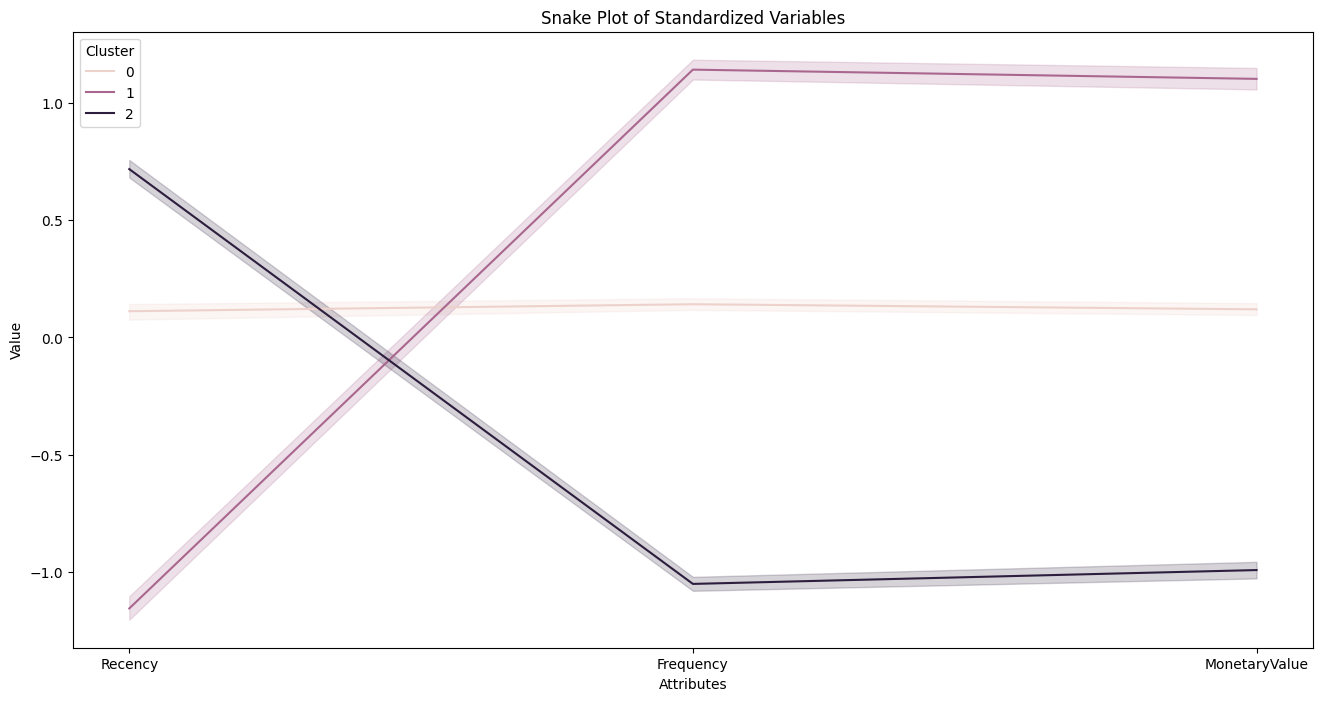

In [308]:
plt.figure(figsize=(16, 8))
plt.title("Snake Plot of Standardized Variables")
sns.lineplot(x="Attributes", y="Value", hue="Cluster", data=normalized_melt_3);

In [309]:
normalized_df_2 = pd.DataFrame(normalized_log_fd, index=feature_data.index, columns=feature_data.columns)
normalized_df_2.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-2.195642,0.909521,1.482882
12748,-2.684553,3.845050,3.022433
12749,-1.706731,1.168000,1.331390
12820,-1.909647,0.530005,0.487337
12822,0.322128,0.008268,0.026297


In [310]:
normalized_df_2['Cluster'] = feature_data_2['Cluster']
normalized_df_2.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,1
12748,-2.684553,3.845050,3.022433,1
12749,-1.706731,1.168000,1.331390,1
12820,-1.909647,0.530005,0.487337,1
12822,0.322128,0.008268,0.026297,0


In [311]:
# Melting the data into long format
normalized_melt_2 = pd.melt(normalized_df_2.reset_index(), id_vars=['CustomerID', 'Cluster'], value_vars=["Recency", "Frequency", "MonetaryValue"], var_name="Attributes", value_name="Value")

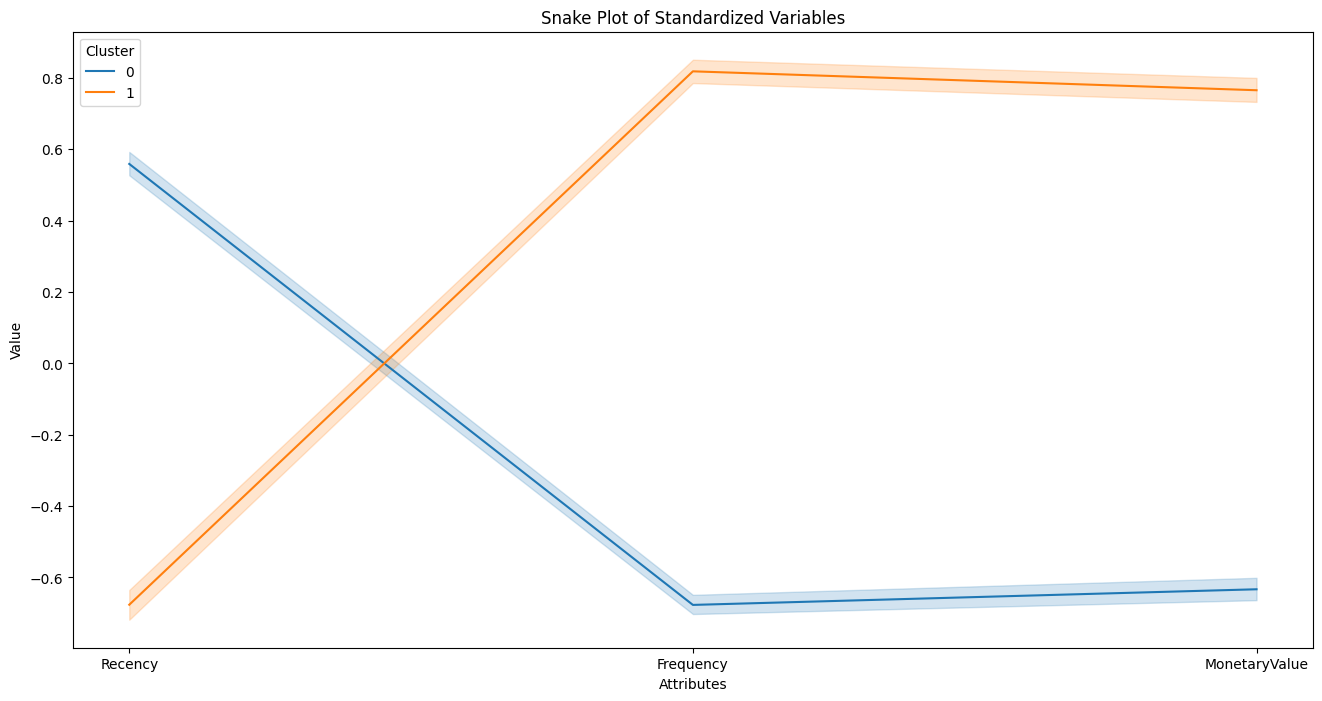

In [312]:
plt.figure(figsize=(16, 8))
plt.title("Snake Plot of Standardized Variables")
sns.lineplot(x="Attributes", y="Value", hue="Cluster", data=normalized_melt_2);

### Now lets calculate the relative importance of the segment attributes

In [313]:
cluster_average_3 = feature_data_3.groupby("Cluster").mean()
population_avarage = feature_data.mean()
relative_importance_3 = cluster_average_3 / population_avarage



In [314]:
relative_importance_3

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.856352,0.678431,0.589489
1,0.158856,2.695742,2.882968
2,1.827466,0.160057,0.139736


### As attributes gets away from 0 the importances of the attribute for the segment

In [315]:
cluster_average_2 = feature_data_2.groupby("Cluster").mean()
population_avarage = feature_data.mean()
relative_importance_2 = cluster_average_2 / population_avarage

In [316]:
relative_importance_2

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.536015,0.278560,0.241237
1,0.351662,1.872619,1.917764


### plot a heatmap for the relative importance

<Axes: ylabel='Cluster'>

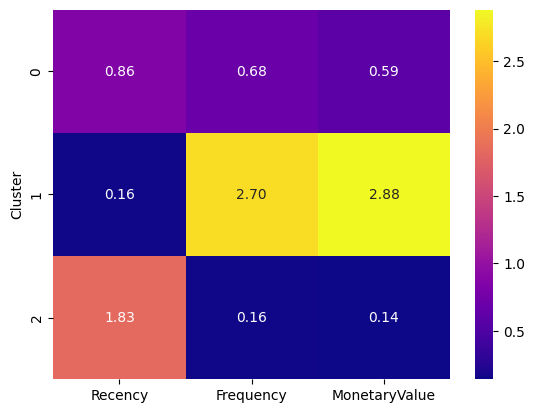

In [317]:
sns.heatmap(data=relative_importance_3, annot=True, fmt="0.2f", cmap="plasma")

<Axes: ylabel='Cluster'>

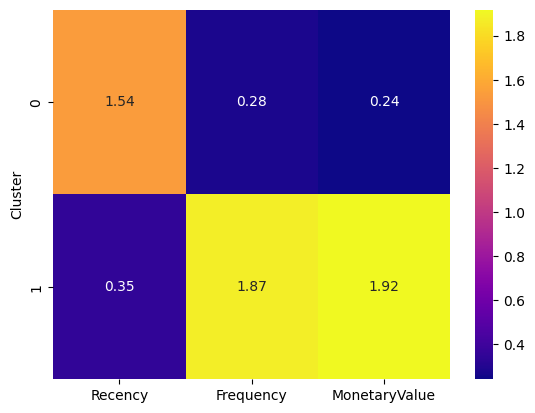

In [318]:
sns.heatmap(data=relative_importance_2, annot=True, fmt="0.2f", cmap="plasma")

# Lets that build a pipeline for our model serve it using streamlit

In [319]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [320]:
class RFMBuilder(BaseEstimator, TransformerMixin):
    def __init__(self, current_date, req_cols):
        self.current_date = current_date
        self.req_cols = req_cols
        self.index_ = None
        self.data_array_ = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rfm_table =  X.groupby(req_cols[0]).agg({
            self.req_cols[1] : lambda x : (current_date - x.max()).days,
            self.req_cols[2] : 'count',
            self.req_cols[3] : 'sum'
        }).rename(columns={
                'InvoiceDate':'Recency',
                'InvoiceNo':'Frequency',
                'TotalSales':'MonetaryValue'
            })
        self.index_ = rfm_table.index
        self.data_array_ = rfm_table.values
        return rfm_table

def log_transform(x):
    return np.log(x)

In [321]:
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [322]:
req_cols = ["CustomerID", "InvoiceDate", "InvoiceNo", "TotalSales"]

In [323]:
rfm_pipeline = Pipeline([
    ('rfm_table', RFMBuilder(snapshot_date, req_cols)),
    ('log_transformer', FunctionTransformer(log_transform)),
    ('scaler',StandardScaler())
])

In [324]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,17.85


In [325]:
rfm_pipeline.fit(df)

Pipeline(steps=[('rfm_table',
                 RFMBuilder(current_date=Timestamp('2011-12-10 12:49:00'),
                            req_cols=['CustomerID', 'InvoiceDate', 'InvoiceNo',
                                      'TotalSales'])),
                ('log_transformer',
                 FunctionTransformer(func=<function log_transform at 0x000002C152938C20>)),
                ('scaler', StandardScaler())])

In [326]:
transform_tb = rfm_pipeline.transform(df)

In [327]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [328]:
kmeans.fit(transform_tb)

KMeans(n_clusters=3, random_state=42)

In [329]:
from joblib import dump, load

In [330]:
dump(rfm_pipeline, "rfm_pipeline_model.joblib")
dump(kmeans, "kmeans_model.joblib")

['kmeans_model.joblib']

In [331]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,17.85


In [332]:
def segment_predict(data):
    # data = pd.DataFrame([[InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]], 
    # columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data["TotalSales"] = data['UnitPrice'].astype("float") * data['Quantity'].astype("int")
    print(data)
    pipeline = load("rfm_pipeline_model.joblib")
    model = load("kmeans_model.joblib")
    return model.predict(pipeline.transform(data))[0]
    

In [333]:
app_interface = gr.Interface(
    fn=segment_predict, 
    inputs=gr.DataFrame(
        headers=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
        col_count=(8, "fixed"),
        row_count=(1, "dynamic"),
        type="pandas",
        datatype=["number", "number", "str", "number", "date", "number", "number", "str"],
        min_width=400
        ),
    outputs=gr.Textbox(label="Segment"),
    submit_btn="Predict",
    css=".unequal-height.svelte-15lo0d8{flex-direction:column}",
    title="Retail Customer Segmentation"
    )

app_interface.launch()

Running on local URL:  http://127.0.0.1:7883

To create a public link, set `share=True` in `launch()`.
